In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

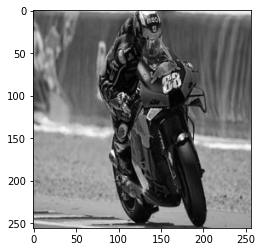

In [37]:
image1 = plt.imread('img/olivera.jpg')
image2 = plt.imread('img/kevin.jpg')
gray1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap='gray')

In [38]:
def compare (image1, image2, tiitle1, tittle2): 
    plt.figure(figsize=[10,5], facecolor='white')
    plt.subplot(121)
    plt.title(tiitle1)
    plt.imshow(image1, cmap='gray')
    plt.subplot(122)
    plt.title(tittle2)
    plt.imshow(image2, cmap='gray')

# 1. HISTOGRAM

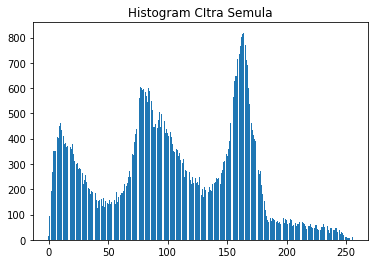

In [39]:
def barHistogram(image, title): # membuat function barHistogram untuk membuat histogram pada suatu gambar dengan parameter image
    result = np.zeros(image.shape[0]) # membuat satu array yang masih bernilai 0 dengan ukuran vertikal dari parameter image   
    for i in range (image.shape[0]): # perulangan dalam variabel i dengan batasan nilai vertikal dari citra parameter image
        for j in range (image.shape[1]): # perulangan dalam variabel j dengan batasan nilai horizontal dari citra parameter image
            v = int(image[i, j]) # inisialisasi variabel val yang berisi nilai pada pixel parameter image
            result [v] += 1  # memberi nilai pada setiap elemen pixel yang melalui perulangan
    
    g = [i for i in range (image.shape[0])] # inisialisasi variabel g dengan nilai perulangan dengan batasan ukuran vertikal parameter image
    # plt.figure(facecolor='white')
    plt.title(title)
    plt.bar(g, result) # menampilkan grafik pada nilai g pada sumbu y dan result pada sumbu x

plt.figure(facecolor='white')
barHistogram(gray1, "Histogram CItra Semula")

# 2. EKUALISASI HISTOGRAM

In [40]:
# equal = np.zeros(gray.shape)
def equalize(img, level):
  hist = np.zeros(level).astype(int)
  tinggi, lebar = img.shape

  # cari histograme
  for i in range(tinggi ):
    for j in range(lebar):
      hist[img[i,j]] +=1

  # cari histogram kumulatifnya
  gldc = np.zeros(level).astype(int)
  for i in range(level):
    gldc[i] = np.sum( hist[0:i+1] )

  # eksekusi formula
  target_value = gldc*(level-1)/(tinggi*lebar)
  target_value = np.floor(target_value).astype(int)

  result = np.zeros(img.shape)
  for i in range(tinggi):
    for j in range(lebar):
      result[i, j] = target_value[img[i,j]]

  return result

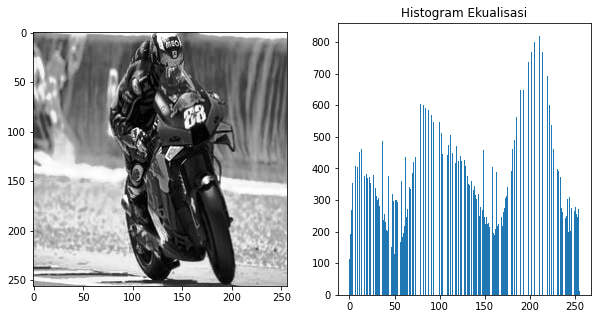

In [41]:
equalimg1 = equalize (gray1, 256)
plt.figure(figsize=[10,5], facecolor='white')
plt.subplot(1, 2, 1)
plt.imshow(equalimg1, cmap='gray')
plt.subplot(1, 2, 2)
barHistogram(equalimg1, "Histogram Ekualisasi")

# 3. SPESIFIKASI HISTOGRAM

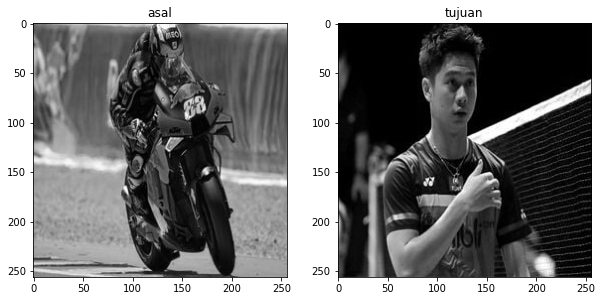

In [42]:
compare(gray1, gray2, 'asal', 'tujuan')

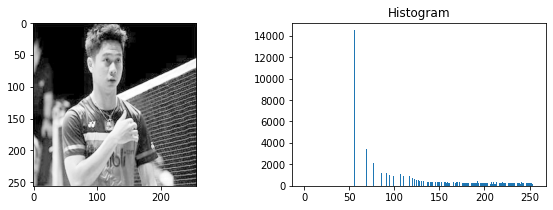

In [43]:
equalimg2 = equalize(gray2, 256).astype(int)
plt.figure(figsize=[10, 3], facecolor='white')
plt.subplot(121)
plt.imshow(equalimg2, cmap='gray')
plt.subplot(122)
barHistogram(equalimg2, "Histogram")

In [44]:
# mencari gray level distri
def grayLevelDistri (result):
    # asal citra
    # mengalikan nilai vertikal dan horizontal citra
    sum = result.shape[0] * result.shape[1]

    # mencari nilai distribusi pada setiap warna
    # dengan inisialisasi tipe data int
    gldAsal = np.zeros(256).astype(int)
    for i in result:
        for j in i:
            gldAsal [j] += 1

    # mencari nilai distribusi kumuliatif setiap warna
    gldAsalKumulatif =  np.zeros(256).astype(int)
    
    for i in range (0, 256):
        for j in range (i+1):
            gldAsalKumulatif [i] += gldAsal [j]

    # mencari nilai kumulatif total dengan rumus 
    # cumulative/total*255
    sumKumulatif = (gldAsalKumulatif/sum)*255

    # melakukan pencarian nilai gray level terdekat pada sumKumulatif dengan cara bulatkan ke atas
    return np.array(np.round(sumKumulatif)).astype(int)

In [45]:
asalNstGray = grayLevelDistri(gray1)
tujuanNstGray = grayLevelDistri(gray2)

In [46]:
def findClosetColor(value, arrive):
    min = abs (value - arrive[0])

    minColor = 0

    for i in range (arrive.shape[0]):
        check = abs (value - arrive[i])
        if min > check :
            min = check
            minColor = i

    return minColor

map = np.zeros(256).astype(int)

# memperbaharui nilai map dengan warna minmal, sesuai dengan fungsi yang sudah dijalankan sebelumnya
for i in range (256):
    map [i] = findClosetColor(asalNstGray[i], tujuanNstGray)


In [47]:
result = np.copy(gray1)

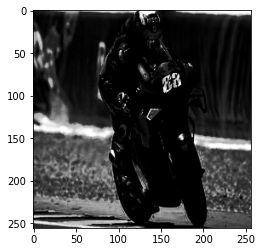

In [48]:
# mengganti nilai setiap pixel dengan nilai baru yang sudah didapatkan
for i in range (256):
    for j in range (256):
        result[i, j] = map [ result[i, j]]

plt.imshow(result, cmap='gray')

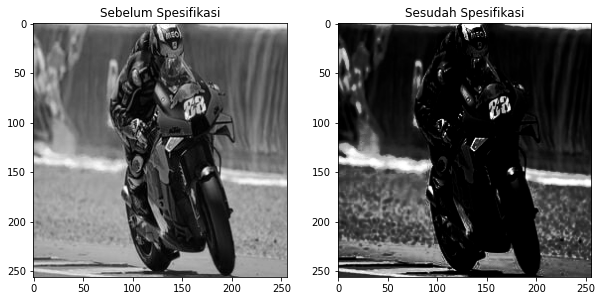

In [49]:
compare(gray1, result, "Sebelum Spesifikasi", "Sesudah Spesifikasi")

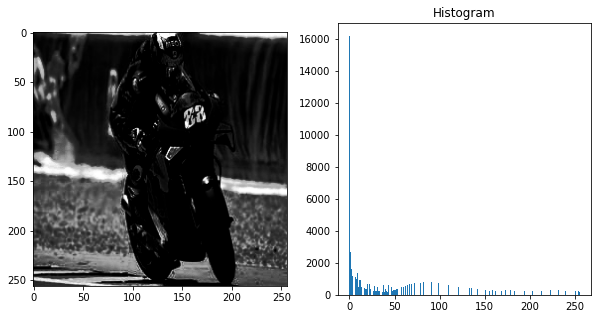

In [50]:
plt.figure(figsize=[10, 5], facecolor='white')
plt.subplot(121)
plt.imshow(result, cmap='gray')
plt.subplot(122)
barHistogram(result, "Histogram")